In [4]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from yellowbrick.cluster import SilhouetteVisualizer

#print 함수 없이 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Iris dataset Load

In [7]:
iris = load_iris()
iris_data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names']+['target'])
iris_data['target'] = iris_data['target'].map({0:'setosa', 1:'versicolor', 2:'virginica'})

In [8]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
iris_data_x = iris_data.iloc[:,:-1]
iris_data_label = iris_data.iloc[:,[-1]]   # target value

In [11]:
iris_data_x.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
29,4.7,3.2,1.6,0.2
0,5.1,3.5,1.4,0.2
111,6.4,2.7,5.3,1.9
127,6.1,3.0,4.9,1.8
76,6.8,2.8,4.8,1.4


In [12]:
iris_data_label.sample(5)

,target
106,virginica
89,versicolor
12,setosa
37,setosa
100,virginica


In [13]:
# MinMaxScaler: normalization
scaler = MinMaxScaler()
scaled_iris = pd.DataFrame(data = scaler.fit_transform(iris_data_x), columns=iris_data_x.columns)
scaled_iris.shape
scaled_iris.head(5)

(150, 4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


## k-means clustering model generate

In [ ]:
example1 : k=2

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(init='random', n_clusters=2,
                                      random_state=1117))

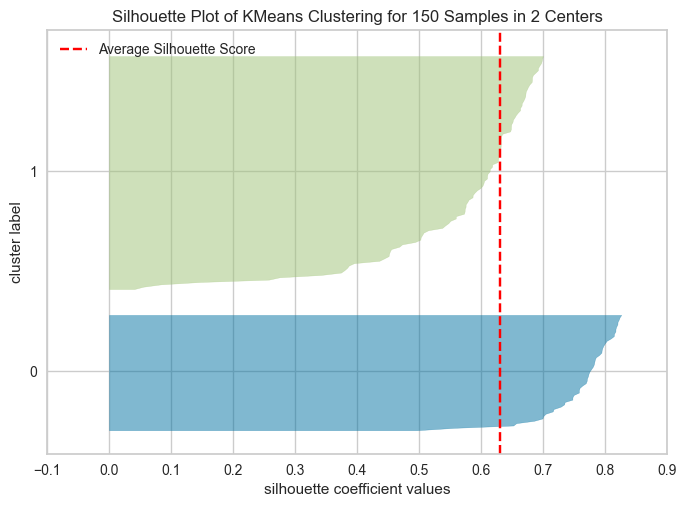

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 150 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [16]:
# k=2
cluster_2 = KMeans(n_clusters=2, random_state=1117, init='random')
visualizer_2 = SilhouetteVisualizer(cluster_2, colors='yellowbrick')

# 실루엣 계수의 전체 평균 값이 크고, 클러스터별 실루엣 계수 평균 값이 클수록 클러스터링이 잘 되었다고 판단할 수 있다. 
## 데이터 포인트가 1에 가까울수록, 값이 급격히 감소하지 않을수록 좋다. 
visualizer_2.fit(scaled_iris)
visualizer_2.show()

In [19]:
# 기존 'scaled_iris' dataframe에 'clusterID', 'silhouette coefficient' 컬럼 추가
result_cluster_2 = scaled_iris.copy()

result_cluster_2.loc[:, 'clusterID'] = visualizer_2.predict(scaled_iris)
result_cluster_2.loc[:, 'silhouette coefficient'] = visualizer_2.silhouette_samples_

result_cluster_2.shape
result_cluster_2.head(5)

(150, 6)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusterID,silhouette coefficient
0,0.222222,0.625000,0.067797,0.041667,0,0.823525
1,0.166667,0.416667,0.067797,0.041667,0,0.758926
2,0.111111,0.500000,0.050847,0.041667,0,0.799924
3,0.083333,0.458333,0.084746,0.041667,0,0.770892
4,0.194444,0.666667,0.067797,0.041667,0,0.816736


In [20]:
# 전체 데이터 silhouette coefficient average: 0.63
result_cluster_2['silhouette coefficient'].mean()

# cluster별 silhouette coefficient average: 0.76(0) / 0.57(1)
result_cluster_2.groupby('clusterID')['silhouette coefficient'].mean().reset_index()

0.6300471284354711

,clusterID,silhouette coefficient
0,0,0.759213
1,1,0.565464


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(init='random', n_clusters=4,
                                      random_state=1117))

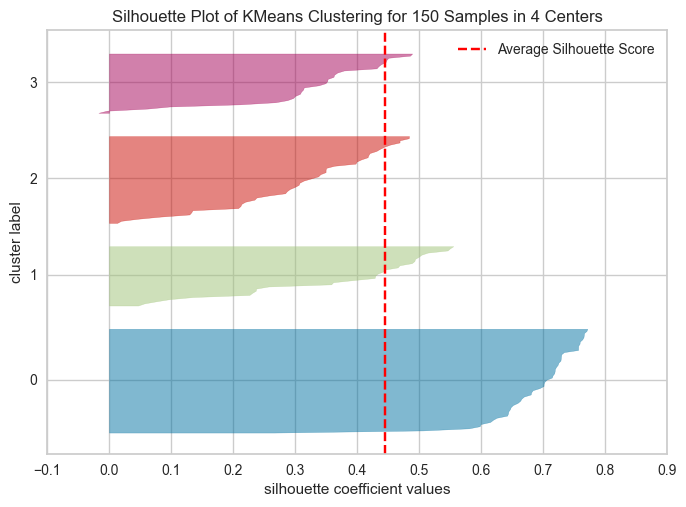

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 150 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [21]:
# k=4
cluster_4 = KMeans(n_clusters=4, random_state=1117, init='random')
visualizer_4 = SilhouetteVisualizer(cluster_4, colors='yellowbrick')

# k=4일 때 실루엣 계수의 전체 평균 값(빨간선)이 더 작다.
# 클러스터 3,2,1 과 클러스터 0의 실루엣 계수의 차이도 크다.
# 클러스터 3,2,1 의 실루엣 계수 값은 가파르게 감소한다.
visualizer_4.fit(scaled_iris)
visualizer_4.show()

In [22]:
# 기존 'scaled_iris' dataframe에 'clusterID', 'silhouette coefficient' 컬럼 추가
result_cluster_4 = scaled_iris.copy()

result_cluster_4.loc[:, 'clusterID'] = visualizer_4.predict(scaled_iris)
result_cluster_4.loc[:, 'silhouette coefficient'] = visualizer_4.silhouette_samples_

result_cluster_4.shape
result_cluster_4.head(5)

(150, 6)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusterID,silhouette coefficient
0,0.222222,0.625000,0.067797,0.041667,0,0.771403
1,0.166667,0.416667,0.067797,0.041667,0,0.663027
2,0.111111,0.500000,0.050847,0.041667,0,0.728935
3,0.083333,0.458333,0.084746,0.041667,0,0.683380
4,0.194444,0.666667,0.067797,0.041667,0,0.765754


In [23]:
# 전체 데이터 silhouette coefficient average: 0.45
result_cluster_4['silhouette coefficient'].mean()

# cluster별 silhouette coefficient average: 0.69(0) / 0.36(1) / 0.30(2) / 0.32(3)
result_cluster_4.groupby('clusterID')['silhouette coefficient'].mean().reset_index()

0.4450654880459854

,clusterID,silhouette coefficient
0,0,0.685612
1,1,0.360983
2,2,0.304187
3,3,0.318444


In [24]:
# [Result]
## k=4일 때, s의 '전체 평균값'과 'cluster별 평균값'이 더 작고, cluster별 편차도 크기 때문에 
## k=2일때 clustering이 더 잘 수행되었다. 